In [100]:
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

import cv2

<b>Bilddaten laden</b><br>

In [101]:
imgData = glob('../../../pics/images_bv_kaschuba/seeds/rapssamen_img/*.*')

In [102]:
imgData

['../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_7.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_8.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_10.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_3.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_2.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_4.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_5.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_0.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_1.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_9.bmp',
 '../../../pics/images_bv_kaschuba/seeds/rapssamen_img/img_part_pos_6.bmp']

<b>Bilddatei einlesen 'cv2.imread'</b><br>

In [103]:
image = cv2.imread(imgData[7])

<b>Konvertierung von BGR zu RGB - 'cv2.cvtColor(image, cv2.COLOR_BGR2RGB)' und von BGR zu GRAY 'cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)'</b><br>

In [104]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

<b>Biddatei 'image_rgb' darstellen/anzeigen</b><br>

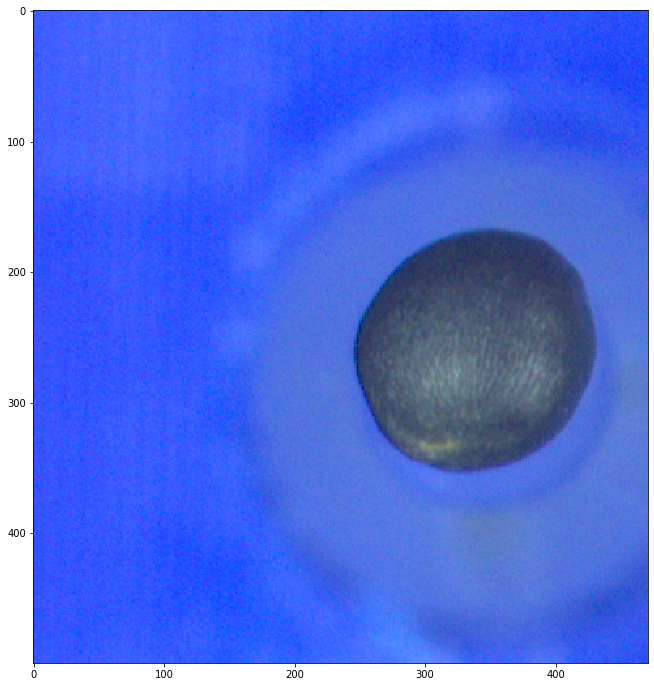

In [105]:
# image_rgb anzeigen: imshow
plt.figure(figsize=(12, 12))
plt.imshow(image_rgb)

# split image

In [106]:
(R, G, B) = cv2.split(image_rgb)

<b>Biddateien R, G und B darstellen/anzeigen</b><br> 

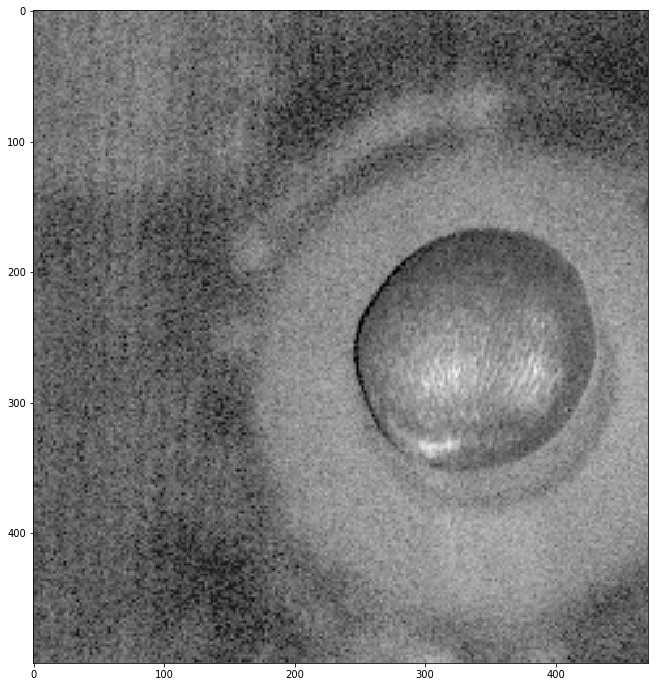

In [107]:
# R, G und B anzeigen: imshow
plt.figure(figsize=(12, 12))
plt.imshow(R, cmap='gray')

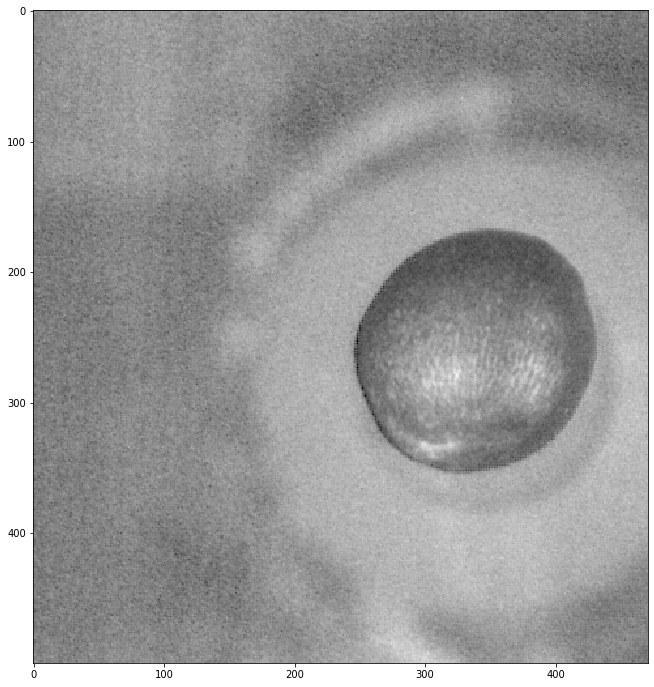

In [108]:
# R, G und B anzeigen: imshow
plt.figure(figsize=(12, 12))
plt.imshow(G, cmap='gray')

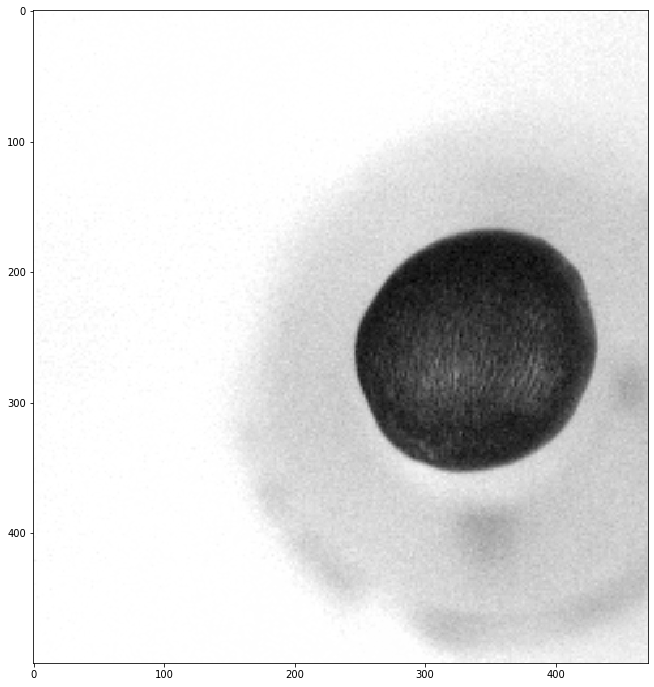

In [109]:
# R, G und B anzeigen: imshow
plt.figure(figsize=(12, 12))
plt.imshow(B, cmap='gray')

In [110]:
# threshold
B_inv = ~B
_, threshold = cv2.threshold(B_inv, 40, 255, cv2.THRESH_BINARY)

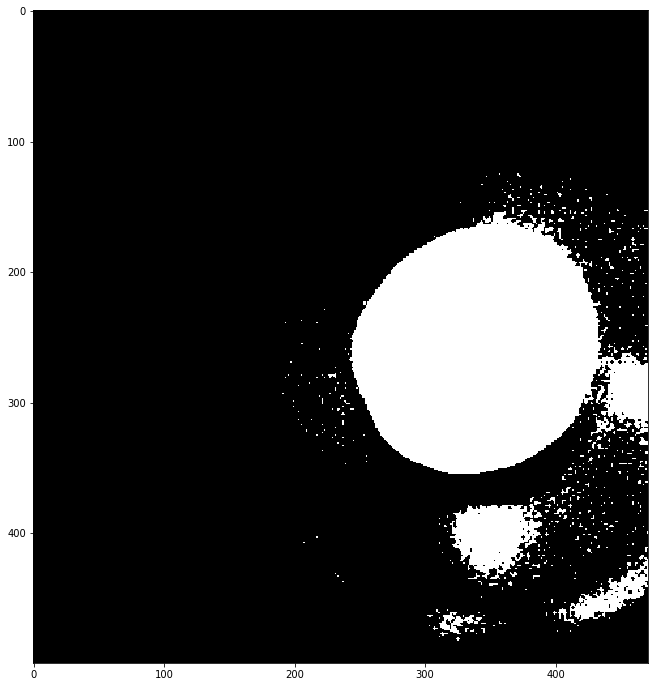

In [111]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(threshold, cmap='gray')

# morphology

In [112]:
# morphology: ERODE
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
morphology_erode = cv2.morphologyEx(threshold, cv2.MORPH_ERODE, kernel, iterations=1)

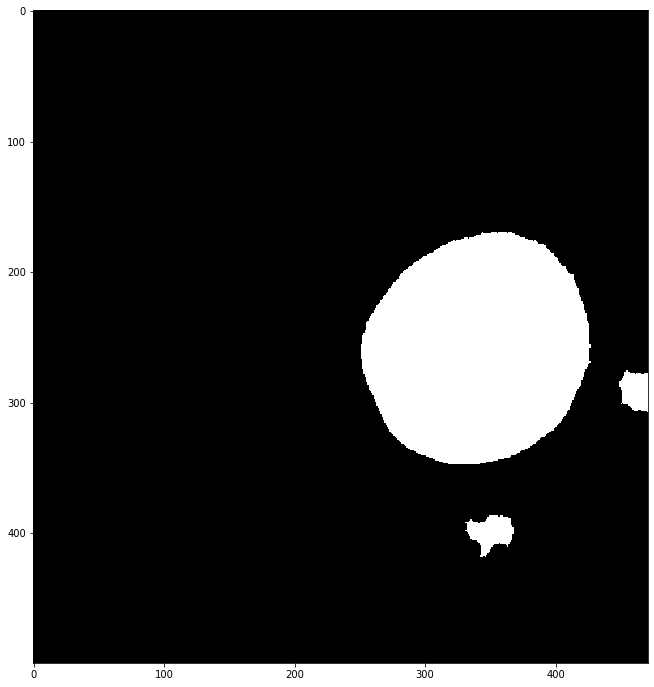

In [113]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(morphology_erode, cmap='gray')

In [114]:
# morphology: DILATE
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
morphology_dilate = cv2.morphologyEx(threshold, cv2.MORPH_DILATE, kernel, iterations=1)

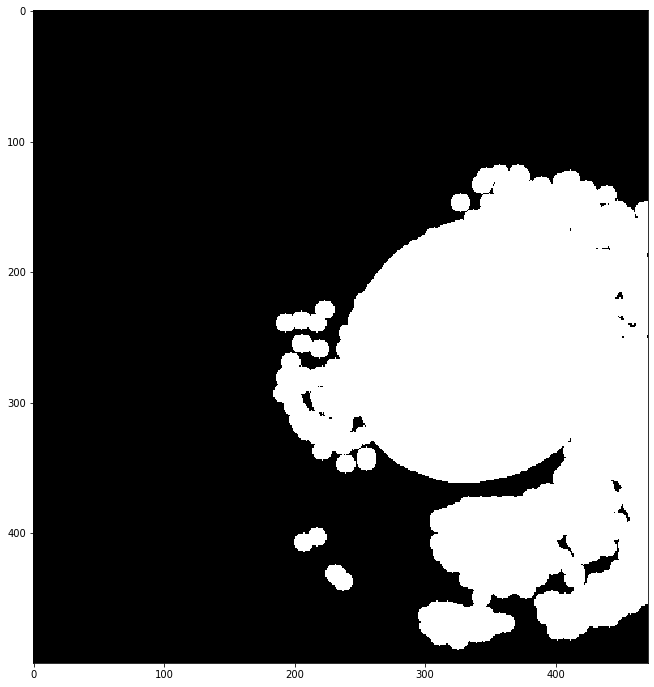

In [115]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(morphology_dilate, cmap='gray')

In [116]:
# morphology: OPEN
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
morphology_open = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=1)

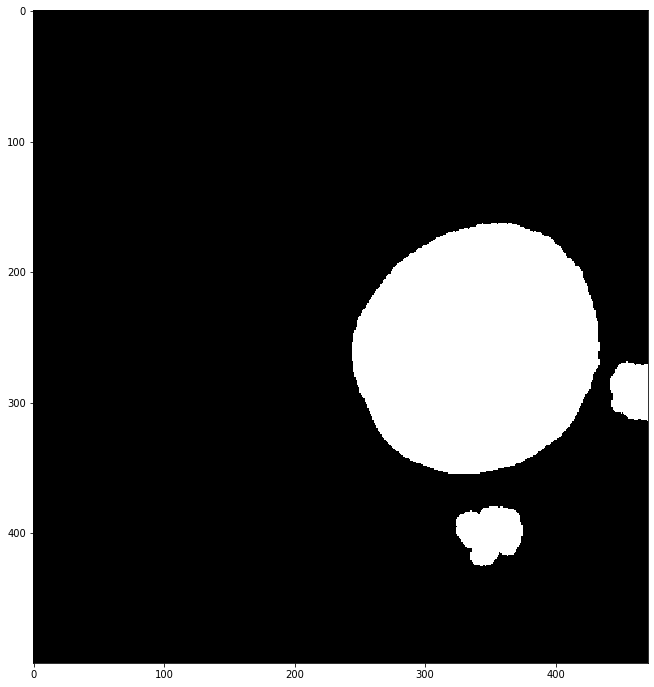

In [117]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(morphology_open, cmap='gray')

In [118]:
# morphology: CLOSE
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
morphology_close = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=1)

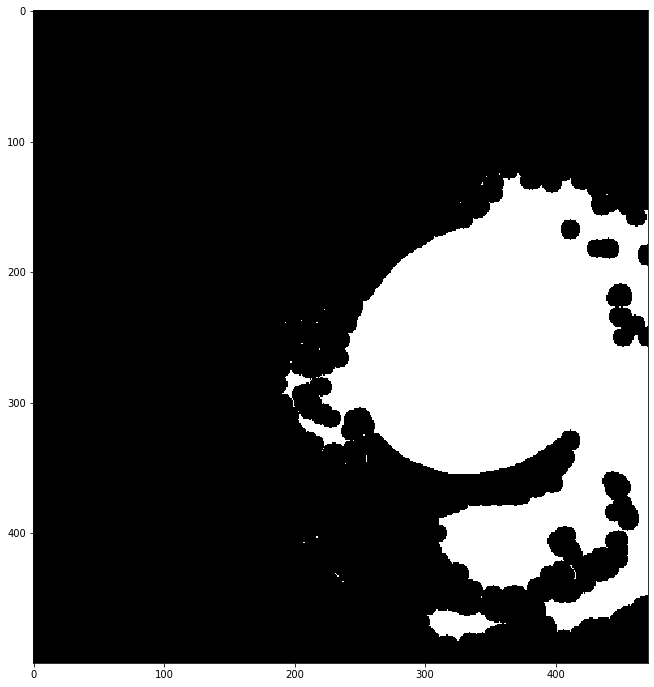

In [119]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(morphology_close, cmap='gray')

# findContours

In [124]:
contours, _ = cv2.findContours(morphology_open, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
draw_image = image_rgb.copy()
for cnt in contours :
    # alle contouren einzeichen
    cv2.drawContours(draw_image, cnt, -1, (255,0,255), 1)
    # moments
    m = cv2.moments(cnt)
    # area
    area = m['m00']
    if area > 10000:
        value = 0
        # alle contouren > 10000 einzeichen
        #cv2.drawContours(draw_image, cnt, -1, (255,0,255), 1)

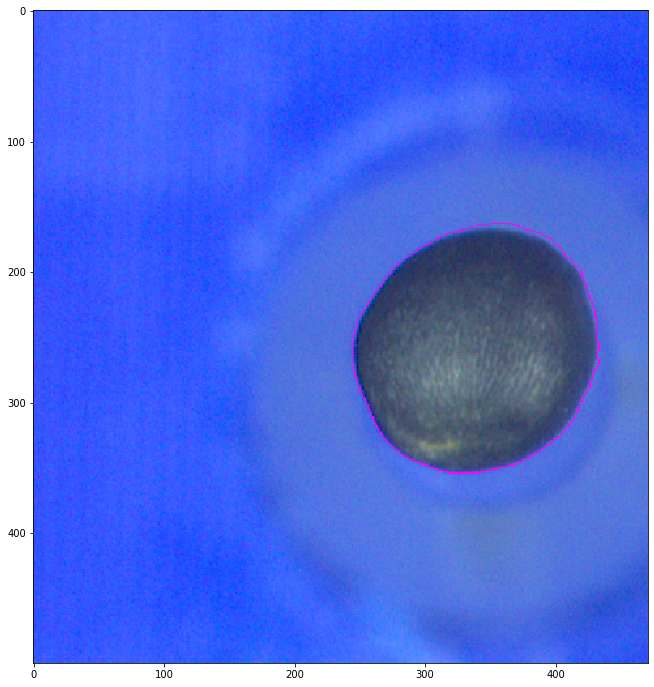

In [125]:
# imshow
plt.figure(figsize=(12, 12))
plt.imshow(draw_image, cmap='gray')